<a href="https://colab.research.google.com/github/Kalisa21/Smart_mobility/blob/main/Traffic_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Models with Optimization Techniques
    
This notebook explores the implementation of various machine learning models with optimization techniques such as
regularization, optimization, and error analysis. The goal is to improve model performance, convergence speed, and efficiency.
    
## Models Implemented:
1. **Neural Network with RMSprop and L2 Regularization**
2. **Neural Network with Adam and L1 Regularization**
3. **Neural Network with SGD and Overfitting Prevention**
4. **Logistic Regression with Hyperparameter Tuning**
5. **Basic Neural Network (No Optimization)**


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/Traffic.csv"
df = pd.read_csv(file_path)

# Encode categorical target variable
label_encoder = LabelEncoder()
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])

# Drop non-numeric and redundant columns
df = df.drop(columns=['Time', 'Date', 'Day of the week'])

# Separate features and target
X = df.drop(columns=['Traffic Situation'])
y = df['Traffic Situation']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_model(y_test, y_pred_classes, title="Confusion Matrix"):
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4949 - loss: 3.3384 - val_accuracy: 0.7232 - val_loss: 1.9653
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7222 - loss: 1.7569 - val_accuracy: 0.7668 - val_loss: 1.1392
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7489 - loss: 1.0801 - val_accuracy: 0.7802 - val_loss: 0.8324
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7865 - loss: 0.8084 - val_accuracy: 0.7735 - val_loss: 0.7296
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7851 - loss: 0.7433 - val_accuracy: 0.7869 - val_loss: 0.6785
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7853 - loss: 0.7120 - val_accuracy: 0.8070 - val_loss: 0.6438
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7949 - loss: 0.6956 - val_accuracy: 0.8037 - val_loss: 0.6268
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8143 - loss: 0.6384 - val_accuracy: 0.8557 - val_loss: 0.6173
Epo

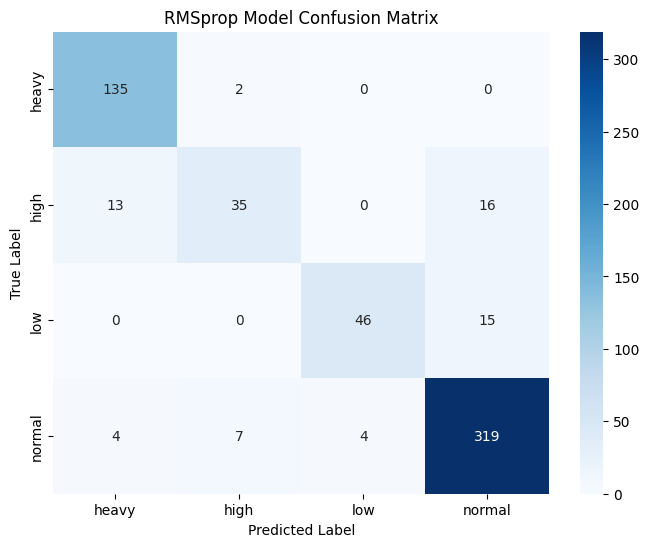

In [ ]:
# Neural Network with RMSprop and L2 Regularization
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.05), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.05)),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)
y_pred = model.predict(X_test).argmax(axis=1)

evaluate_model(y_test, y_pred, title="RMSprop Model Confusion Matrix")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5325 - loss: 3.9490 - val_accuracy: 0.7081 - val_loss: 2.7816
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6981 - loss: 2.5778 - val_accuracy: 0.7584 - val_loss: 1.8295
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7370 - loss: 1.7286 - val_accuracy: 0.7685 - val_loss: 1.2807
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7551 - loss: 1.2544 - val_accuracy: 0.7685 - val_loss: 1.0494
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 1.1008 - val_accuracy: 0.7802 - val_loss: 0.9392
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7371 - loss: 0.9995 - val_accuracy: 0.7785 - val_loss: 0.8701
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7678 - loss: 0.9068 - val_accuracy: 0.7852 - val_loss: 0.8179
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7641 - loss: 0.8836 - val_accuracy: 0.7886 - val_loss: 0.7809
Epo

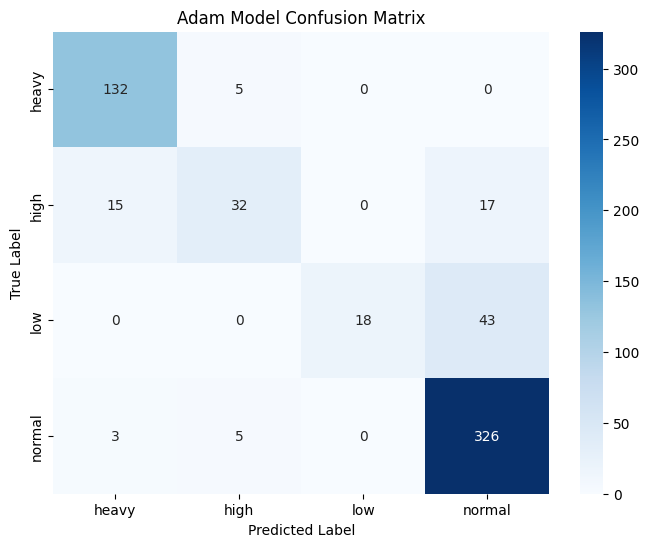

In [ ]:
# Neural Network with Adam and L1 Regularization
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)
y_pred = model.predict(X_test).argmax(axis=1)

evaluate_model(y_test, y_pred, title="Adam Model Confusion Matrix")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6397 - loss: 1.4119 - val_accuracy: 0.8138 - val_loss: 0.8074
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8286 - loss: 0.7656 - val_accuracy: 0.8389 - val_loss: 0.5880
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.5850 - val_accuracy: 0.8641 - val_loss: 0.4959
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8614 - loss: 0.5342 - val_accuracy: 0.8708 - val_loss: 0.4483
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8834 - loss: 0.4588 - val_accuracy: 0.8993 - val_loss: 0.4137
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8926 - loss: 0.4107 - val_accuracy: 0.8758 - val_loss: 0.4055
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8732 - loss: 0.4255 - val_accuracy: 0.8943 - val_loss: 0.3862
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8810 - loss: 0.4019 - val_accuracy: 0.8943

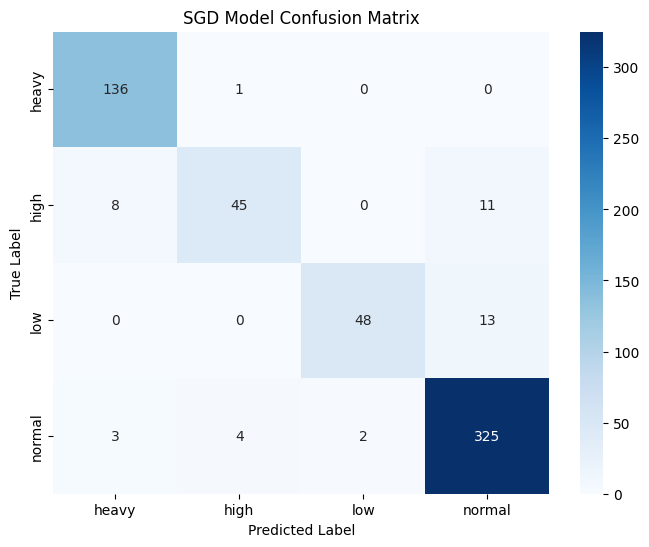

In [ ]:
# Neural Network with SGD
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, callbacks=[early_stopping], verbose=1)
y_pred = model.predict(X_test).argmax(axis=1)

evaluate_model(y_test, y_pred, title="SGD Model Confusion Matrix")


Accuracy: 0.8003
Precision: 0.7797
Recall: 0.8003
F1 Score: 0.7614


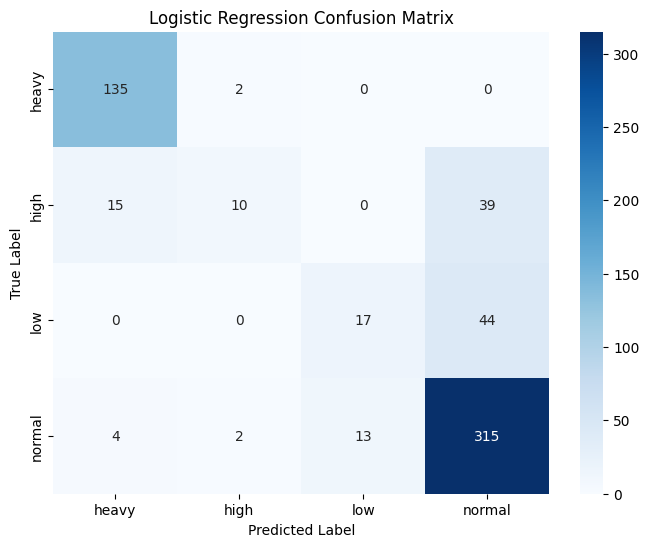

In [ ]:
# Logistic Regression with Hyperparameter Tuning
log_reg = LogisticRegression(max_iter=200, solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
evaluate_model(y_test, y_pred, title="Logistic Regression Confusion Matrix")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6662 - loss: 0.9756 - val_accuracy: 0.7584 - val_loss: 0.5834
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7931 - loss: 0.5117 - val_accuracy: 0.8473 - val_loss: 0.3944
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8799 - loss: 0.3541 - val_accuracy: 0.8960 - val_loss: 0.3151
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9196 - loss: 0.2812 - val_accuracy: 0.9178 - val_loss: 0.2711
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9210 - loss: 0.2524 - val_accuracy: 0.9161 - val_loss: 0.2503
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9191 - loss: 0.2290 - val_accuracy: 0.9161 - val_loss: 0.2290
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9264 - loss: 0.2021 - val_accuracy: 0.9161 - val_loss: 0.2132
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9414 - loss: 0.1751 - val_accuracy: 0.9178 - val_loss: 0.2024
Epo

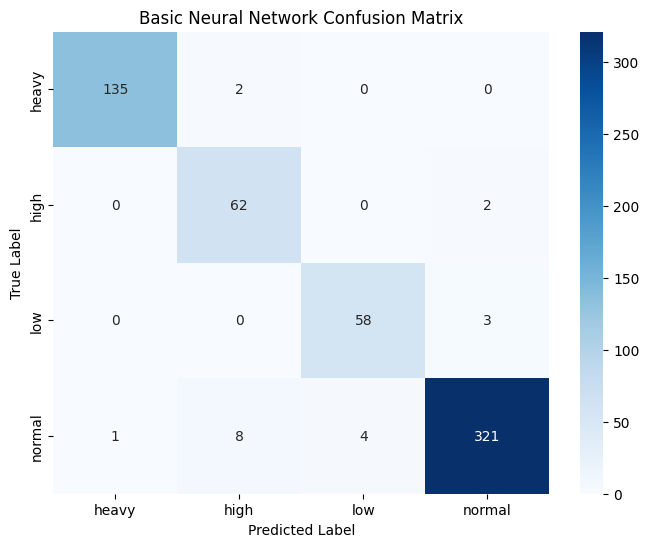

In [ ]:
# Basic Neural Network Without Optimization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)
y_pred = model.predict(X_test).argmax(axis=1)

evaluate_model(y_test, y_pred, title="Basic Neural Network Confusion Matrix")
